In [2]:
import os, scipy, sys, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from src.STARDUST.util import * # import functions from util.py

In [3]:
csv_path = '/Users/mikodai/Desktop/0319_Slice2_NE.csv'

In [4]:
raw_traces, filtered_traces = raw_to_filtered(csv_path)

Reading in file:  /Users/mikodai/Desktop/0319_Slice2_NE.csv 


Applying a lowpass Butterworth filter with a 4 th order filter at the cutoff of 0.4 Hz


In [23]:
# baseline determination
dff_traces, baselines, thresholds, signal_frames, signal_boundaries, signal_threshold = iterative_baseline(filtered_traces, include_incomplete=True, baseline_end = 200)

Using signal threshold of 2.0* SD and detecting baseline from frame 0 to 200.

Processing round 1 of signal detection...
ROAs with signal:  84
ROAs without signal:  0

Processing round 2 of signal detection...
ROAs with signal:  84
ROAs without signal:  0

Processing round 3 of signal detection...
ROAs with signal:  84
ROAs without signal:  0

Processing round 4 of signal detection...
ROAs with signal:  84
ROAs without signal:  0

Processing round 5 of signal detection...
ROAs with signal:  84
ROAs without signal:  0

Processing round 6 of signal detection...
ROAs with signal:  84
ROAs without signal:  0



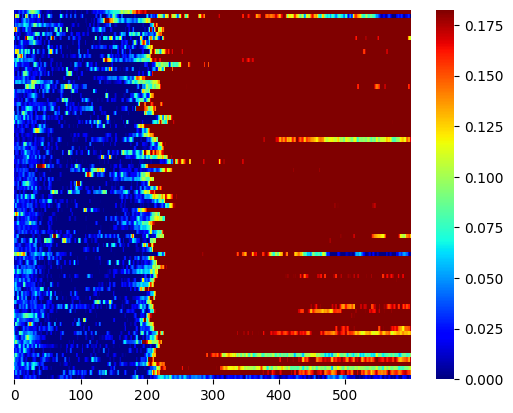

In [24]:
sns.heatmap(dff_traces, vmin = 0, vmax = (signal_threshold + 2) * thresholds.mean(), 
            xticklabels=100, yticklabels= False, cmap = 'jet');

In [25]:
signal_stats = analyze_signal(dff_traces, signal_frames, signal_boundaries, frame_rate = 1.058, drug_frame = 200)

In [26]:
signal_stats.head()

,ROA_ID,signal_start_frame,signal_start_time,signal_end_frame,signal_end_time,peak_frame,peak_time,AUC,amplitude,signal_to_noise,rise_time,decay_time,half_width,duration,inter_event_interval,epoch
0,1,116,108.695652,NaN,NaN,597,564.272212,NaN,0.756139,7.441859,4.553520,NaN,NaN,NaN,NaN,drug
1,2,16,14.177694,42.0,38.752363,38,35.916824,1.332132,0.147723,1.186523,12.463958,2.166274,0.069441,24.574669,NaN,baseline
2,2,49,45.368620,60.0,55.765595,52,49.149338,0.412151,0.078825,0.633128,2.660448,5.175978,0.034666,10.396975,6.616257,baseline
3,2,68,63.327032,77.0,71.833648,71,67.107750,0.302232,0.068545,0.550556,2.141898,2.929988,0.032212,8.506616,7.561437,baseline
4,2,138,129.489603,160.0,150.283554,150,141.776938,0.869894,0.092337,0.741661,10.117993,6.580791,0.040584,20.793951,57.655955,baseline


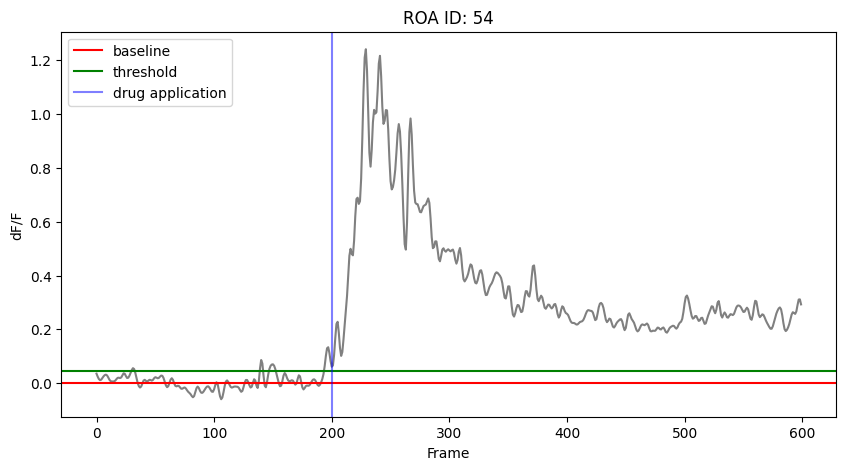

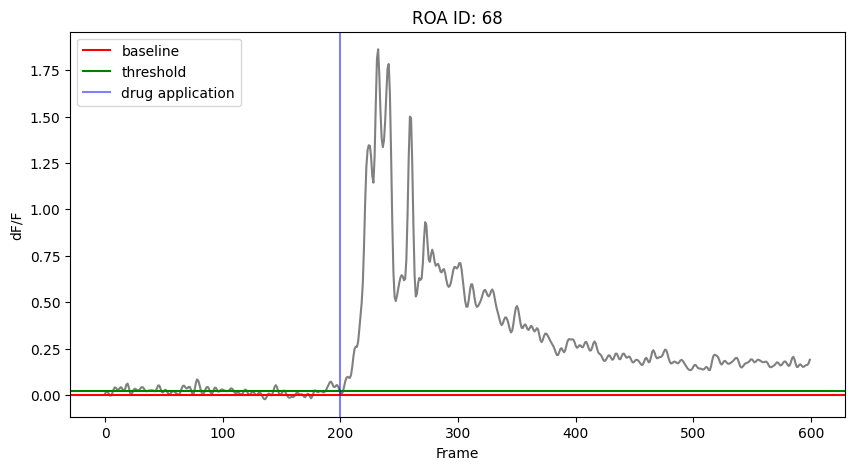

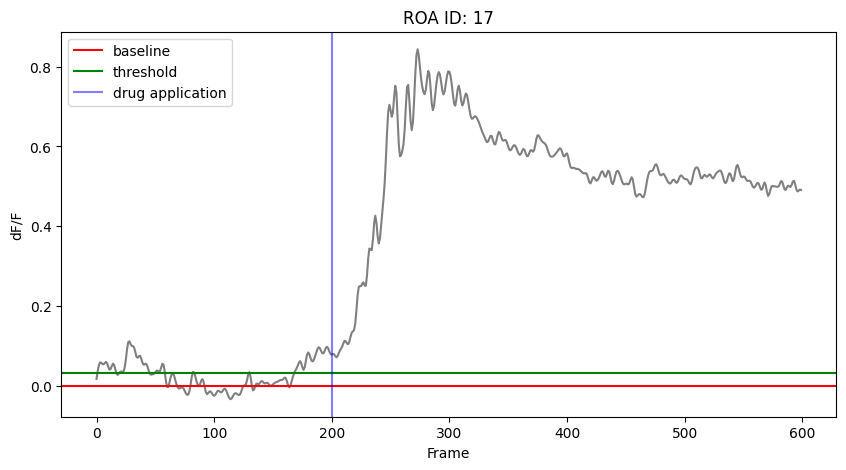

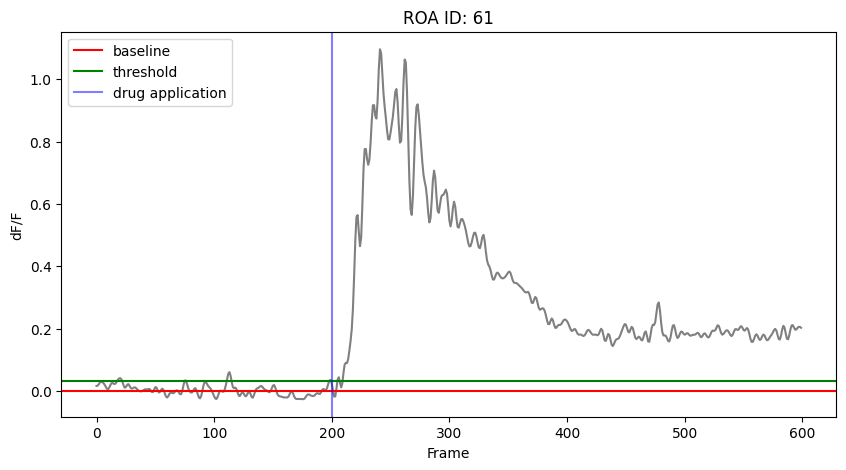

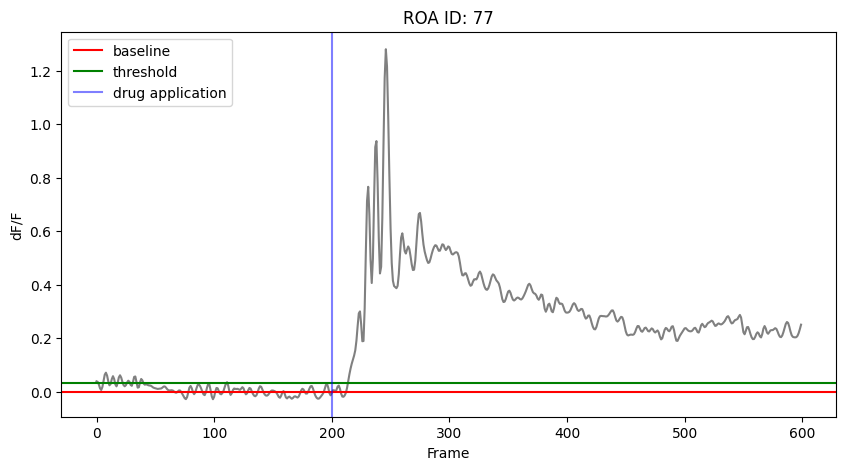

In [27]:
inspect_trace(np.random.randint(1,83, 5), dff_traces, baselines, thresholds, drug_frame = 200)


In [15]:
np.random.randint(0,83)

29